In [1]:
# analyze result
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import re
OUTPUT_FOLDER = os.path.join(os.getcwd(),"output") #Path to save output images

In [3]:
# read data from file: window_method_evaluation_stats.txt put into a dict for plotting next
# Each line is a entry, "avg_abs_5: mean error: 125.53909366662023, std error: 46.39340263375098" means 
# metric name is "avg_abs", window size is "5", mean is "125.53909366662023" and std is "46.39340263375098". 
def read_data(file_path):
    data_dict = {}
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip().split(':')
            metric_name = line[0].strip()
            window_size = line[1].strip().split()[0]
            mean = float(line[2].strip().split(':')[1])
            std = float(line[3].strip().split(':')[1])
            data_dict[f"{metric_name}_{window_size}"] = {'mean': mean, 'std': std}
    return data_dict


In [2]:
file_path = os.path.join(OUTPUT_FOLDER, "window_method_evaluation_stats.txt")


In [4]:
# read the txt file
# data_dict = read_data(file_path)
data_dict = {}
with open(file_path, 'r') as f:
    for line in f:
        line = line.strip().split(':')
        metric_name = line[0].strip()
        window_size = line[1].strip().split()[0]
        mean = float(line[2].strip().split(':')[1])
        std = float(line[3].strip().split(':')[1])
        data_dict[f"{metric_name}_{window_size}"] = {'mean': mean, 'std': std}


IndexError: list index out of range

In [10]:
with open(file_path, 'r') as file:
    lines = file.readlines()

# Define the regex pattern to extract data
# pattern = r'(\w+)_([0-9]+): mean error: ([\d\.]+), std error: ([\d\.]+)'
pattern = r'([a-zA-Z]+\d*\.?\d*)_(\d+): mean error: ([\d\.]+), std error: ([\d\.]+)'


In [11]:
lines

['avg_abs_5: mean error: 125.53909366662023, std error: 46.39340263375098\n',
 'avg_abs_55: mean error: 114.70615476528823, std error: 51.006000835006525\n',
 'avg_abs_95: mean error: 114.16259396431988, std error: 50.37295420706629\n',
 'avg_abs_155: mean error: 111.69214879765046, std error: 50.54658227292976\n',
 'avg_abs_255: mean error: 106.84311219356381, std error: 51.298827202592555\n',
 'rms_5: mean error: 145.0210078237737, std error: 55.01867314191314\n',
 'rms_55: mean error: 139.3098684669906, std error: 57.67848082997685\n',
 'rms_95: mean error: 139.12462536259793, std error: 57.39252882438121\n',
 'rms_155: mean error: 137.4557079787006, std error: 57.58878924774352\n',
 'rms_255: mean error: 133.75896717163045, std error: 58.384315358381556\n',
 'A50_5: mean error: 136.0426767985026, std error: 50.15101474849318\n',
 'A50_55: mean error: 122.4690673828125, std error: 59.71119860413396\n',
 'A50_95: mean error: 122.13788757324218, std error: 55.41761341459833\n',
 'A50_

In [15]:


# List to store the data
data = []

# Process each line with the regex pattern
for line in lines:
    match = re.search(pattern, line)
    if match:
        metric_name = match.group(1)
        window_size = match.group(2)
        mean_error = match.group(3)
        std_error = match.group(4)
        data.append([metric_name, window_size, mean_error, std_error])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Metric Name', 'Window Size', 'Mean', 'Std'])
df


,Metric Name,Window Size,Mean,Std
0,abs,5,125.53909366662023,46.39340263375098
1,abs,55,114.70615476528823,51.006000835006525
2,abs,95,114.16259396431988,50.37295420706629
3,abs,155,111.69214879765046,50.54658227292976
4,abs,255,106.84311219356381,51.298827202592555
5,rms,5,145.0210078237737,55.01867314191314
6,rms,55,139.3098684669906,57.67848082997685
7,rms,95,139.12462536259793,57.39252882438121
8,rms,155,137.4557079787006,57.58878924774352
9,rms,255,133.75896717163045,58.384315358381556


In [16]:
# Save to Excel file
excel_path = os.path.join(OUTPUT_FOLDER, "output_file.xlsx")
df.to_excel(excel_path, index=False)

print(f'Data saved to {excel_path}')

Data saved to c:\Github\cv_proj\output\output_file.xlsx


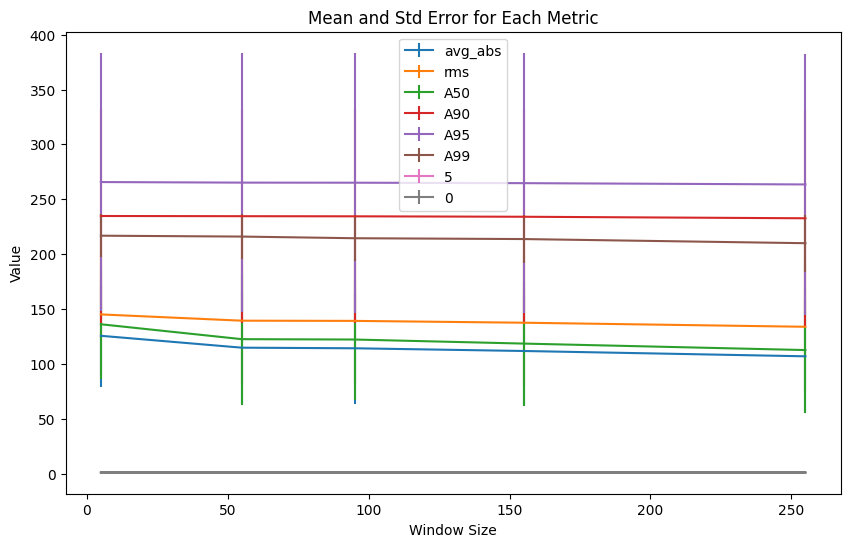

In [8]:
# plot mean and std error for each metric, normalize mean and std by the max of mean for that metric, x-axis is window size
# each metric has a line, with mean and std error as y-axis
# metric names are from df['Metric Name'].unique()
# window sizes are from df['Window Size'].unique()
# mean and std errors are from df['Mean'] and df['Std']
# hint: use plt.errorbar
metric_names = df['Metric Name'].unique()
window_sizes = df['Window Size'].unique()

plt.figure(figsize=(4, 3))
for metric in metric_names:
    metric_data = df[df['Metric Name'] == metric]
    mean_values = metric_data['Mean'].astype(float)
    std_values = metric_data['Std'].astype(float)
    window_sizes = metric_data['Window Size'].astype(int)
    plt.errorbar(window_sizes, mean_values, yerr=std_values, label=metric)

plt.xlabel('Window Size')
plt.ylabel('Value')
plt.title('Mean and Std Error for Each Metric')
plt.legend()
plt.show()

In [20]:
df['Mean'] / max_mean

TypeError: unsupported operand type(s) for /: 'str' and 'str'

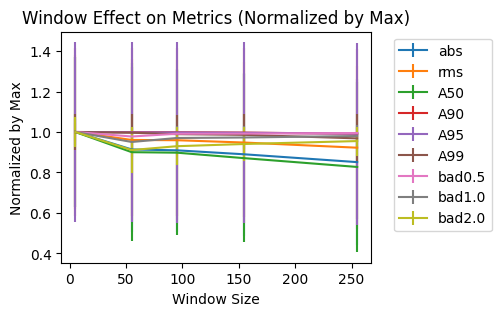

In [31]:
# plot mean and std error for each metric, normalize mean and std by the max of mean for that metric, x-axis is window size
# each metric has a line, with mean and std error as y-axis
# metric names are from df['Metric Name'].unique()
# window sizes are from df['Window Size'].unique()
# mean and std errors are from df['Mean'] and df['Std']
# hint: use plt.errorbar
# Get unique metric names and window sizes
metric_names = df['Metric Name'].unique()
window_sizes = df['Window Size'].unique()

# Normalize mean by the max of mean for each metric
max_mean = df.groupby('Metric Name')['Mean'].transform('max')
# convert to numeric
max_mean = max_mean.astype(float)
# convert mean and std to numeric
df['Mean'] = df['Mean'].astype(float)
df['Std'] = df['Std'].astype(float)

# Add a new column to store the normalized mean
df['Normalized Mean'] = df['Mean'] / max_mean
# normalize std as well
df['Normalized Std'] = df['Std'] / max_mean


# Plotting
plt.figure(figsize=(4, 3))
for metric in metric_names:
    metric_data = df[df['Metric Name'] == metric]
    normalized_mean_values = metric_data['Normalized Mean'].astype(float)
    std_values = metric_data['Normalized Std'].astype(float)
    window_sizes = metric_data['Window Size'].astype(int)
    plt.errorbar(window_sizes, normalized_mean_values, yerr=std_values, label=metric)

plt.xlabel('Window Size')
plt.ylabel('Normalized by Max')
plt.title('Window Effect on Metrics (Normalized by Max)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


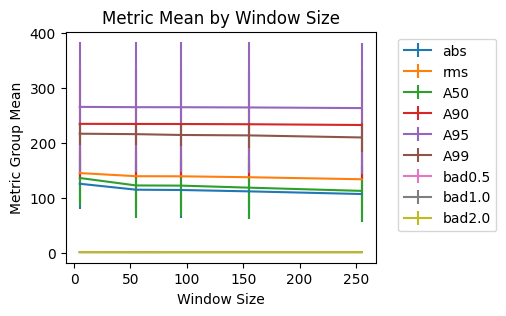

In [33]:
# Plot the mean for each metric x window size
# hint: use plt.plot
plt.figure(figsize=(4, 3))
for metric in metric_names:
    metric_data = df[df['Metric Name'] == metric]
    mean_values = metric_data['Mean'].astype(float)
    std_values = metric_data['Std'].astype(float)
    window_sizes = metric_data['Window Size'].astype(int)

    plt.errorbar(window_sizes, mean_values, yerr=std_values, label=metric)

    # plt.plot(window_sizes, mean_values, label=metric)
    # # also plot scatter points
    # plt.scatter(window_sizes, mean_values)
    
plt.xlabel('Window Size')
plt.ylabel('Metric Group Mean')
plt.title('Metric Mean by Window Size')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

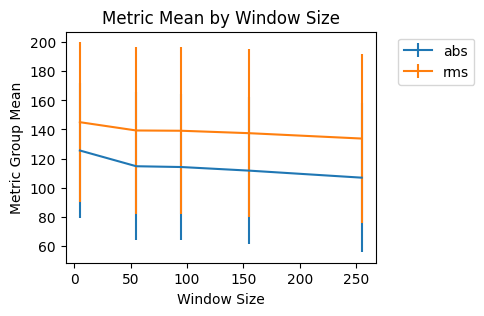

In [42]:
# Plot the mean for each metric x window size
# hint: use plt.plot
plt.figure(figsize=(4, 3))
for metric in metric_names:
    # metric contains bad
    if 'A' in metric:
        continue
    if 'bad' in metric:
        continue

    metric_data = df[df['Metric Name'] == metric]
    mean_values = metric_data['Mean'].astype(float)
    std_values = metric_data['Std'].astype(float)
    window_sizes = metric_data['Window Size'].astype(int)

    plt.errorbar(window_sizes, mean_values, yerr=std_values, label=metric)

    # plt.plot(window_sizes, mean_values, label=metric)
    # # also plot scatter points
    # plt.scatter(window_sizes, mean_values)
    
plt.xlabel('Window Size')
plt.ylabel('Metric Group Mean')
plt.title('Metric Mean by Window Size')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()